In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import csv
import seaborn as sns
%matplotlib inline

In [2]:
path = Path("../rawdata/Howard-USA-GDP-Details.csv")
df = pd.read_csv(path, skiprows=4)

In [3]:
#drop nulls
df = df.dropna()

In [4]:
# drop geofips
df2 = df.drop(columns=["GeoFips"])

In [5]:
df2

,GeoName,LineCode,Description,2015,2016,2017,2018,2019
0,United States *,1.0,All industry total,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,United States *,2.0,Private industries,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,United States *,3.0,"Agriculture, forestry, fishing and hunting",182283.0,166571.0,176625.0,178569.0,175373.0
3,United States *,4.0,Farms,147384.0,130639.0,140053.0,140271.0,136080.0
4,United States *,5.0,"Forestry, fishing, and related activities",34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...,...
5579,Far West,88.0,Trade,400509.8,403823.2,423391.3,435665.6,462623.3
5580,Far West,89.0,Transportation and utilities,142351.0,151508.6,161271.6,172189.2,189817.3
5581,Far West,90.0,Manufacturing and information,671138.4,699937.9,753013.2,801925.5,839734.0
5582,Far West,91.0,Private goods-producing industries 2/,584587.0,590830.7,629723.0,670682.2,684935.3


In [6]:
df2 = df2.drop(columns="LineCode")

In [7]:
df2

,GeoName,Description,2015,2016,2017,2018,2019
0,United States *,All industry total,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,United States *,Private industries,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,United States *,"Agriculture, forestry, fishing and hunting",182283.0,166571.0,176625.0,178569.0,175373.0
3,United States *,Farms,147384.0,130639.0,140053.0,140271.0,136080.0
4,United States *,"Forestry, fishing, and related activities",34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...
5579,Far West,Trade,400509.8,403823.2,423391.3,435665.6,462623.3
5580,Far West,Transportation and utilities,142351.0,151508.6,161271.6,172189.2,189817.3
5581,Far West,Manufacturing and information,671138.4,699937.9,753013.2,801925.5,839734.0
5582,Far West,Private goods-producing industries 2/,584587.0,590830.7,629723.0,670682.2,684935.3


In [8]:
#California df
ca_df=df2[(df2.GeoName=='California')]
#Washington df
wa_df = df2[(df2.GeoName=='Washington')]
#Colorado df
co_df = df2[(df2.GeoName=='Colorado')]
#US df
us_df = df2[(df2.GeoName=='United States *')]

In [9]:
us_df

,GeoName,Description,2015,2016,2017,2018,2019
0,United States *,All industry total,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0
1,United States *,Private industries,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0
2,United States *,"Agriculture, forestry, fishing and hunting",182283.0,166571.0,176625.0,178569.0,175373.0
3,United States *,Farms,147384.0,130639.0,140053.0,140271.0,136080.0
4,United States *,"Forestry, fishing, and related activities",34899.0,35932.0,36571.0,38298.0,39293.0
...,...,...,...,...,...,...,...
92,United States *,Private services-providing industries 3/,12630266.0,13128956.0,13663384.0,14390257.0,15070376.0
93,United States *,"All industry total, overseas activity",111953.0,113124.0,113759.0,116757.0,119703.0
94,United States *,"Government and government enterprises, oversea...",111953.0,113124.0,113759.0,116757.0,119703.0
95,United States *,"Federal civilian, overseas activity",5176.0,5320.0,5412.0,5490.0,5582.0


In [10]:
#change column data from strings to floats
us_df['2015']=us_df['2015'].astype(float)
us_df['2016']=us_df['2016'].astype(float)
us_df['2017']=us_df['2017'].astype(float)
us_df['2018']=us_df['2018'].astype(float)
us_df['2019']=us_df['2019'].astype(float)

In [11]:
#ca_df change to floats
ca_df['2015']=ca_df['2015'].astype(float)
ca_df['2016']=ca_df['2016'].astype(float)
ca_df['2017']=ca_df['2017'].astype(float)
ca_df['2018']=ca_df['2018'].astype(float)
ca_df['2019']=ca_df['2019'].astype(float)

In [12]:
#wa_df change to floats
wa_df['2015']=wa_df['2015'].astype(float)
wa_df['2016']=wa_df['2016'].astype(float)
wa_df['2017']=wa_df['2017'].astype(float)
wa_df['2018']=wa_df['2018'].astype(float)
wa_df['2019']=wa_df['2019'].astype(float)

In [13]:
#co_df change to floats
co_df['2015']=co_df['2015'].astype(float)
co_df['2016']=co_df['2016'].astype(float)
co_df['2017']=co_df['2017'].astype(float)
co_df['2018']=co_df['2018'].astype(float)
co_df['2019']=co_df['2019'].astype(float)

In [14]:
co_df

,GeoName,Description,2015,2016,2017,2018,2019
562,Colorado,All industry total,317992.4,327757.3,348175.5,372452.9,392986.0
563,Colorado,Private industries,278529.9,286825.4,305256.3,327281.3,345536.8
564,Colorado,"Agriculture, forestry, fishing and hunting",2781.1,2591.1,2336.2,2494.4,2970.4
565,Colorado,Farms,2427.4,2242.3,1961.0,2109.8,2550.9
566,Colorado,"Forestry, fishing, and related activities",353.6,348.7,375.2,384.6,419.5
...,...,...,...,...,...,...,...
650,Colorado,Trade,35781.2,36882.5,38595.5,40212.4,42370.3
651,Colorado,Transportation and utilities,16239.7,15636.1,15913.9,17231.3,18799.9
652,Colorado,Manufacturing and information,41460.0,40870.2,42888.8,46472.6,49368.5
653,Colorado,Private goods-producing industries 2/,53077.6,52030.1,57493.0,63679.9,64414.1


In [15]:
#drop GeoName
us_df_tot = us_df.drop(columns='GeoName')

In [16]:
#ca drop geoname
ca_df_tot = ca_df.drop(columns='GeoName')

In [17]:
#co drop geoname
co_df_tot = co_df.drop(columns='GeoName')

In [18]:
#wa drop geoname
wa_df_tot = wa_df.drop(columns='GeoName')

In [19]:
#set index to description
us_df_tot = us_df_tot.set_index('Description')

In [20]:
#set index to description
ca_df_tot = ca_df_tot.set_index('Description')

In [21]:
#set index to description
wa_df_tot = wa_df_tot.set_index('Description')

In [22]:
#set index to description
co_df_tot = co_df_tot.set_index('Description')

In [23]:
#transpose
us_df_tot = us_df_tot.T

In [24]:
#transpose
wa_df_tot = wa_df_tot.T

In [25]:
#transpose
ca_df_tot = ca_df_tot.T

In [26]:
#transpose
co_df_tot = co_df_tot.T

In [27]:
#remove spaces from title
co_df_tot.columns = co_df_tot.columns.str.replace("  ","")
co_df_tot.columns = co_df_tot.columns.str.replace("    ","")
for col in co_df_tot.columns:
    print(col)

All industry total
Private industries
Agriculture, forestry, fishing and hunting
Farms
Forestry, fishing, and related activities
Mining, quarrying, and oil and gas extraction
Oil and gas extraction
Mining (except oil and gas)
Support activities for mining
Utilities
Construction
Manufacturing
Durable goods manufacturing
Wood product manufacturing
Nonmetallic mineral product manufacturing
Primary metal manufacturing
Fabricated metal product manufacturing
Machinery manufacturing
Computer and electronic product manufacturing
Electrical equipment, appliance, and component manufacturing
Motor vehicles, bodies and trailers, and parts manufacturing
Other transportation equipment manufacturing
Furniture and related product manufacturing
Miscellaneous manufacturing
Nondurable goods manufacturing
Food and beverage and tobacco product manufacturing
Textile mills and textile product mills
Apparel, leather, and allied product manufacturing
Paper manufacturing
Printing and related support activities


In [28]:
#remove spaces from title
ca_df_tot.columns = ca_df_tot.columns.str.replace("  ","")
ca_df_tot.columns = ca_df_tot.columns.str.replace("    ","")
for col in ca_df_tot.columns:
    print(col)

All industry total
Private industries
Agriculture, forestry, fishing and hunting
Farms
Forestry, fishing, and related activities
Mining, quarrying, and oil and gas extraction
Oil and gas extraction
Mining (except oil and gas)
Support activities for mining
Utilities
Construction
Manufacturing
Durable goods manufacturing
Wood product manufacturing
Nonmetallic mineral product manufacturing
Primary metal manufacturing
Fabricated metal product manufacturing
Machinery manufacturing
Computer and electronic product manufacturing
Electrical equipment, appliance, and component manufacturing
Motor vehicles, bodies and trailers, and parts manufacturing
Other transportation equipment manufacturing
Furniture and related product manufacturing
Miscellaneous manufacturing
Nondurable goods manufacturing
Food and beverage and tobacco product manufacturing
Textile mills and textile product mills
Apparel, leather, and allied product manufacturing
Paper manufacturing
Printing and related support activities


In [29]:
#remove spaces from title
wa_df_tot.columns = wa_df_tot.columns.str.replace("  ","")
wa_df_tot.columns = wa_df_tot.columns.str.replace("    ","")
for col in wa_df_tot.columns:
    print(col)

All industry total
Private industries
Agriculture, forestry, fishing and hunting
Farms
Forestry, fishing, and related activities
Mining, quarrying, and oil and gas extraction
Oil and gas extraction
Mining (except oil and gas)
Support activities for mining
Utilities
Construction
Manufacturing
Durable goods manufacturing
Wood product manufacturing
Nonmetallic mineral product manufacturing
Primary metal manufacturing
Fabricated metal product manufacturing
Machinery manufacturing
Computer and electronic product manufacturing
Electrical equipment, appliance, and component manufacturing
Motor vehicles, bodies and trailers, and parts manufacturing
Other transportation equipment manufacturing
Furniture and related product manufacturing
Miscellaneous manufacturing
Nondurable goods manufacturing
Food and beverage and tobacco product manufacturing
Textile mills and textile product mills
Apparel, leather, and allied product manufacturing
Paper manufacturing
Printing and related support activities


In [30]:
#remove spaces from title
us_df_tot.columns = us_df_tot.columns.str.replace("  ","")
us_df_tot.columns = us_df_tot.columns.str.replace("    ","")
for col in us_df_tot.columns:
    print(col)

All industry total
Private industries
Agriculture, forestry, fishing and hunting
Farms
Forestry, fishing, and related activities
Mining, quarrying, and oil and gas extraction
Oil and gas extraction
Mining (except oil and gas)
Support activities for mining
Utilities
Construction
Manufacturing
Durable goods manufacturing
Wood product manufacturing
Nonmetallic mineral product manufacturing
Primary metal manufacturing
Fabricated metal product manufacturing
Machinery manufacturing
Computer and electronic product manufacturing
Electrical equipment, appliance, and component manufacturing
Motor vehicles, bodies and trailers, and parts manufacturing
Other transportation equipment manufacturing
Furniture and related product manufacturing
Miscellaneous manufacturing
Nondurable goods manufacturing
Food and beverage and tobacco product manufacturing
Textile mills and textile product mills
Apparel, leather, and allied product manufacturing
Paper manufacturing
Printing and related support activities


In [31]:
#set new data frame for major industries
ca_maj_df = ca_df_tot[['Farms','Utilities','Construction','Manufacturing','Retail trade','Transportation and warehousing','Information','Finance, insurance, real estate, rental, and leasing', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and business services', 'Professional, scientific, and technical services', 'Educational services, health care, and social assistance', 'Arts, entertainment, recreation, accommodation, and food services',]]

In [32]:
#set new data frame for major industries
wa_maj_df = wa_df_tot[['Farms','Utilities','Construction','Manufacturing','Retail trade','Transportation and warehousing','Information','Finance, insurance, real estate, rental, and leasing', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and business services', 'Professional, scientific, and technical services', 'Educational services, health care, and social assistance', 'Arts, entertainment, recreation, accommodation, and food services',]]

In [33]:
#set new data frame for major industries
co_maj_df = co_df_tot[['Farms','Utilities','Construction','Manufacturing','Retail trade','Transportation and warehousing','Information','Finance, insurance, real estate, rental, and leasing', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and business services', 'Professional, scientific, and technical services', 'Educational services, health care, and social assistance', 'Arts, entertainment, recreation, accommodation, and food services',]]

In [34]:
#set new data frame for major industries
us_maj_df = us_df_tot[['Farms','Utilities','Construction','Manufacturing','Retail trade','Transportation and warehousing','Information','Finance, insurance, real estate, rental, and leasing', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and business services', 'Professional, scientific, and technical services', 'Educational services, health care, and social assistance', 'Arts, entertainment, recreation, accommodation, and food services',]]

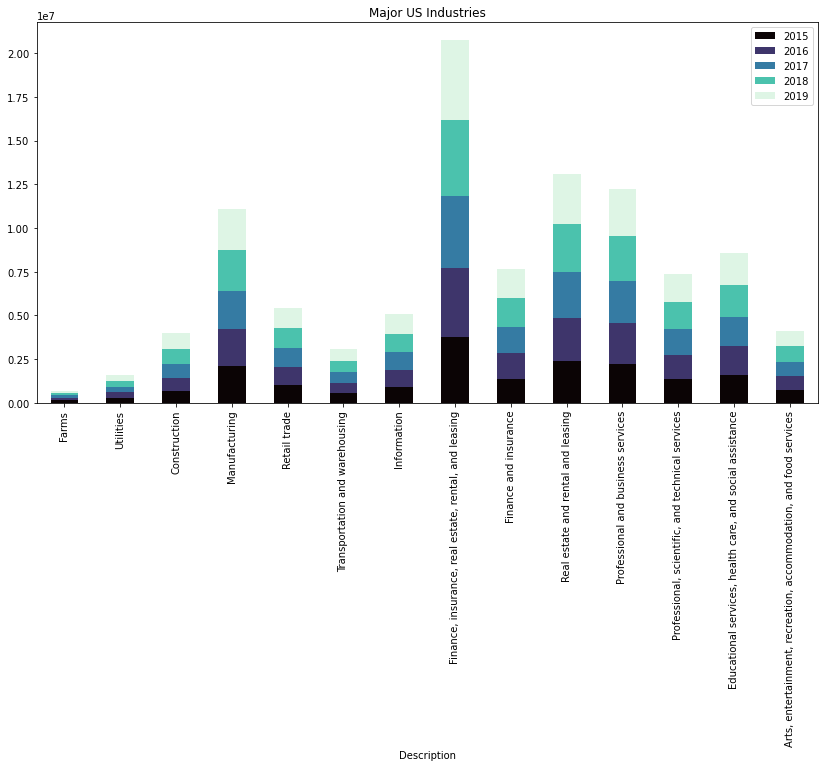

In [35]:
us_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major US Industries")


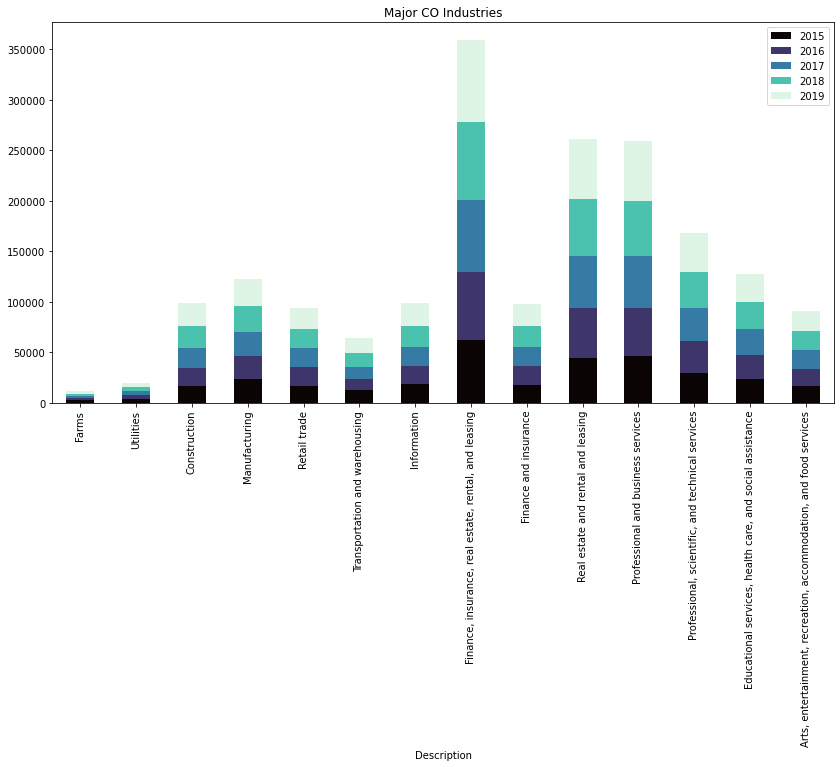

In [36]:
co_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major CO Industries")

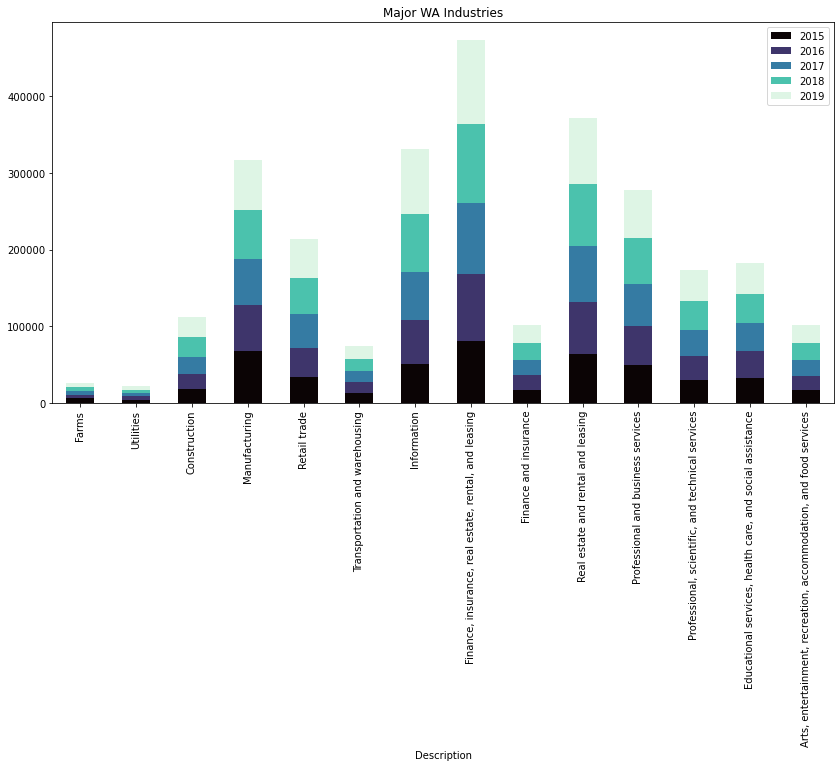

In [37]:
wa_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major WA Industries")

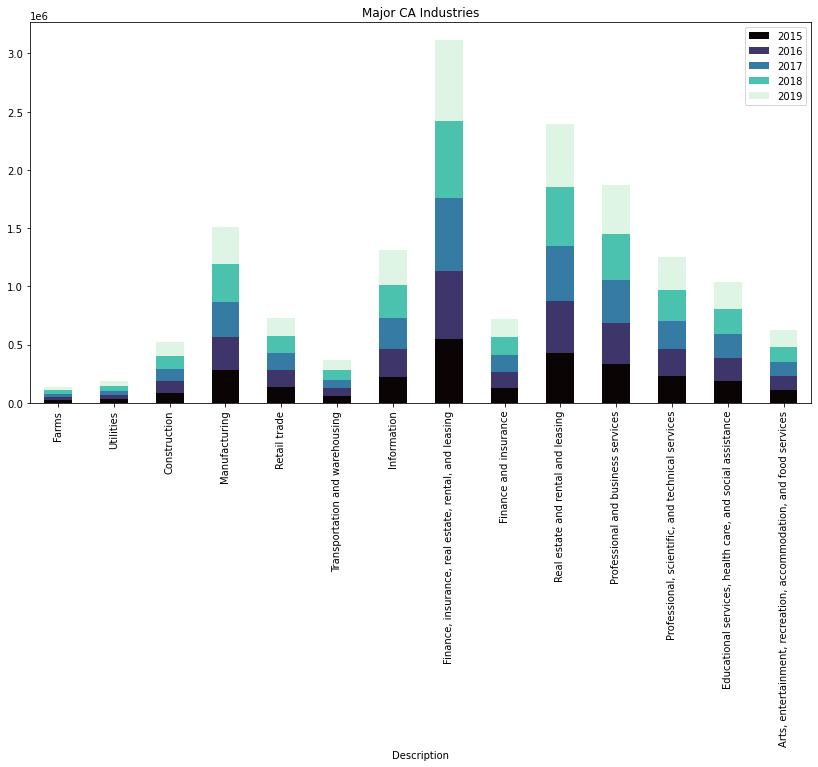

In [38]:
ca_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major CA Industries")

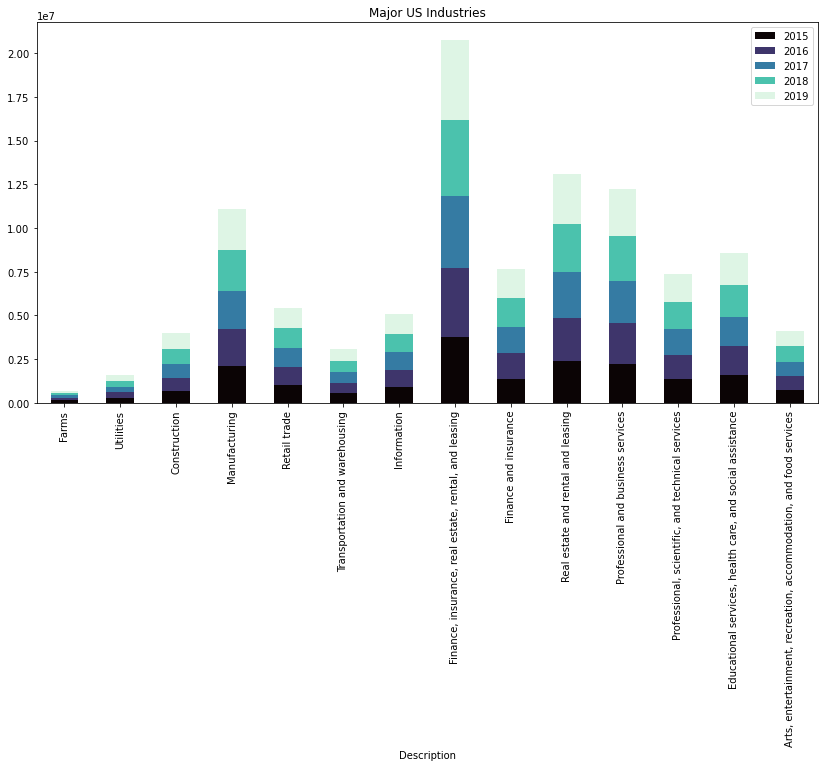

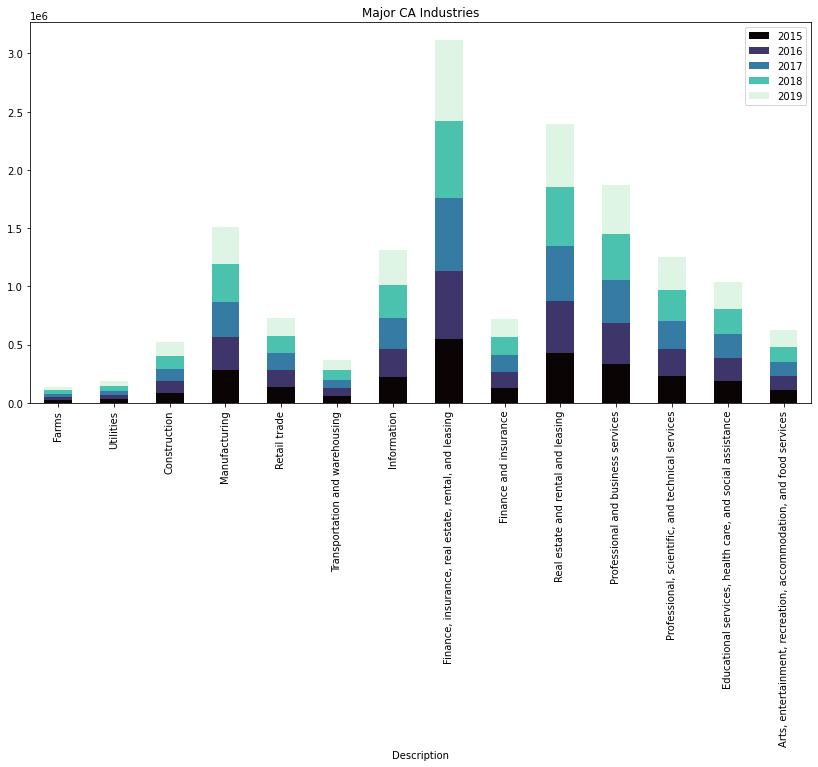

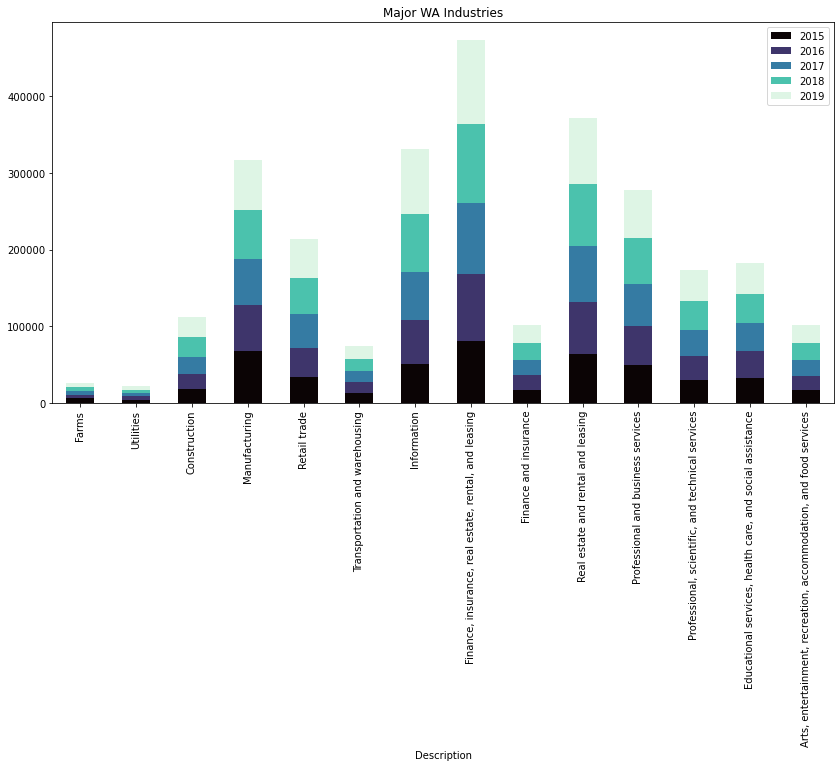

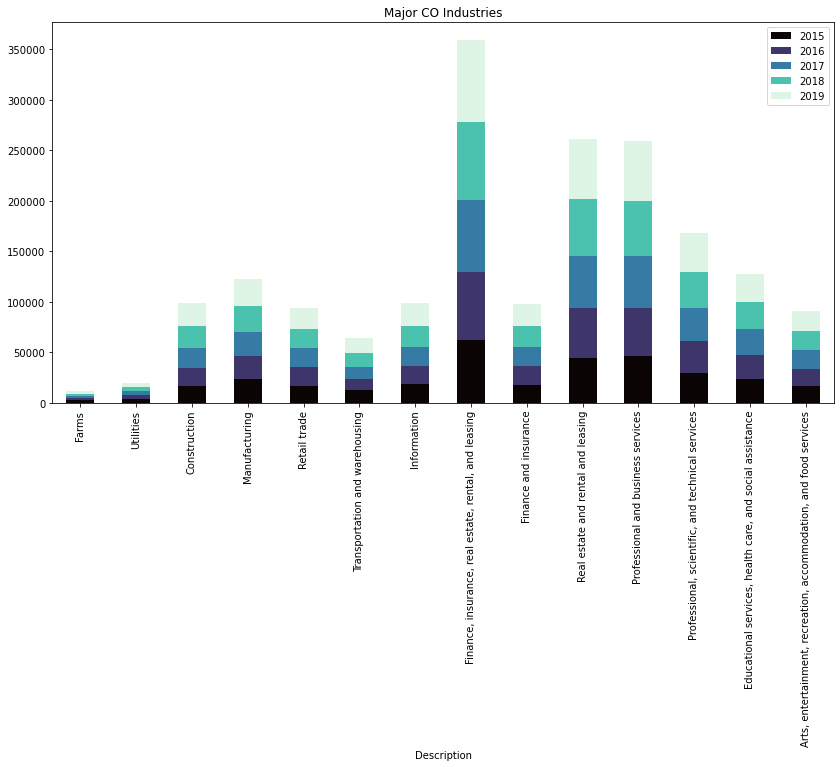

In [39]:
us_bar_plot = us_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major US Industries")
ca_bar_plot = ca_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major CA Industries")
wa_bar_plot = wa_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major WA Industries")
co_bar_plot = co_maj_df.T.plot.bar(stacked=True, figsize=(14,7), cmap='mako', title="Major CO Industries")

In [40]:
us_pc= us_maj_df.sum().pct_change()

In [41]:
us_pc

Description
Farms                                                                     NaN
Utilities                                                            1.258210
Construction                                                         1.538344
Manufacturing                                                        1.781510
Retail trade                                                        -0.509172
Transportation and warehousing                                      -0.429151
Information                                                          0.633690
Finance, insurance, real estate, rental, and leasing                 3.089436
Finance and insurance                                               -0.631674
Real estate and rental and leasing                                   0.714984
Professional and business services                                  -0.063860
Professional, scientific, and technical services                    -0.397281
Educational services, health care, and social assist

In [42]:
us_pct_chg = us_maj_df.pct_change()

In [43]:
ca_pct_chg = ca_maj_df.pct_change()

In [44]:
co_pct_chg = co_maj_df.pct_change()

In [45]:
wa_pct_chg = wa_maj_df.pct_change()